        pre_speeds  post_speeds
count  1680.000000  1680.000000
mean     15.266071    15.205357
std       2.735955     2.653748
min       9.000000     8.000000
25%      13.000000    13.750000
50%      15.000000    15.000000
75%      17.000000    17.000000
max      23.000000    22.000000
Weighted Pre-Treatment Speed: 14.22 mph
Weighted Post-Treatment Speed: 14.11 mph
T-Statistic: 2.635, P-Value: 0.008


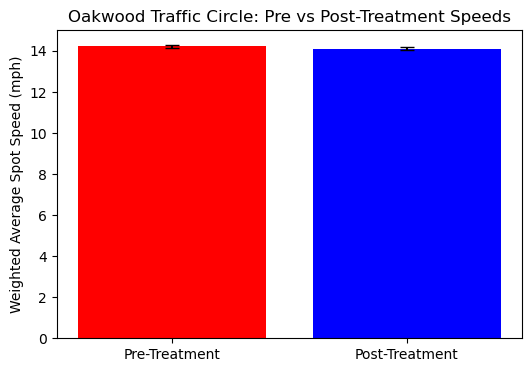

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Oakwood_pre_treatment.csv')
post_treatment = pd.read_csv('data/Oakwood_post_treatment.csv')

filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
pre_treatment = pre_treatment[~filters]
filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')
post_treatment = post_treatment[~filters]

pre_speeds = pre_treatment['Avg Spot Speed (mph)']
post_speeds = post_treatment['Avg Spot Speed (mph)']
pre_volume = pre_treatment['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

df = pd.DataFrame({'pre_speeds': pre_speeds, 
                   'post_speeds': post_speeds})
summary_table = df.describe()
print(summary_table)

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_se = pre_weighted_std / (len(pre_speeds) ** 0.5)
post_weighted_se = post_weighted_std / (len(post_speeds) ** 0.5)


valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (mph)')
plt.title('Oakwood Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()


In [8]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

Weighted Pre-Treatment 85th Speed Percentile: 19.27 mph
Weighted Post-Treatment 85th Speed Percentile: 19.10 mph
Weighted Pre-Treatment 95th Speed Percentile: 24.27 mph
Weighted Post-Treatment 95th Speed Percentile: 24.01 mph
